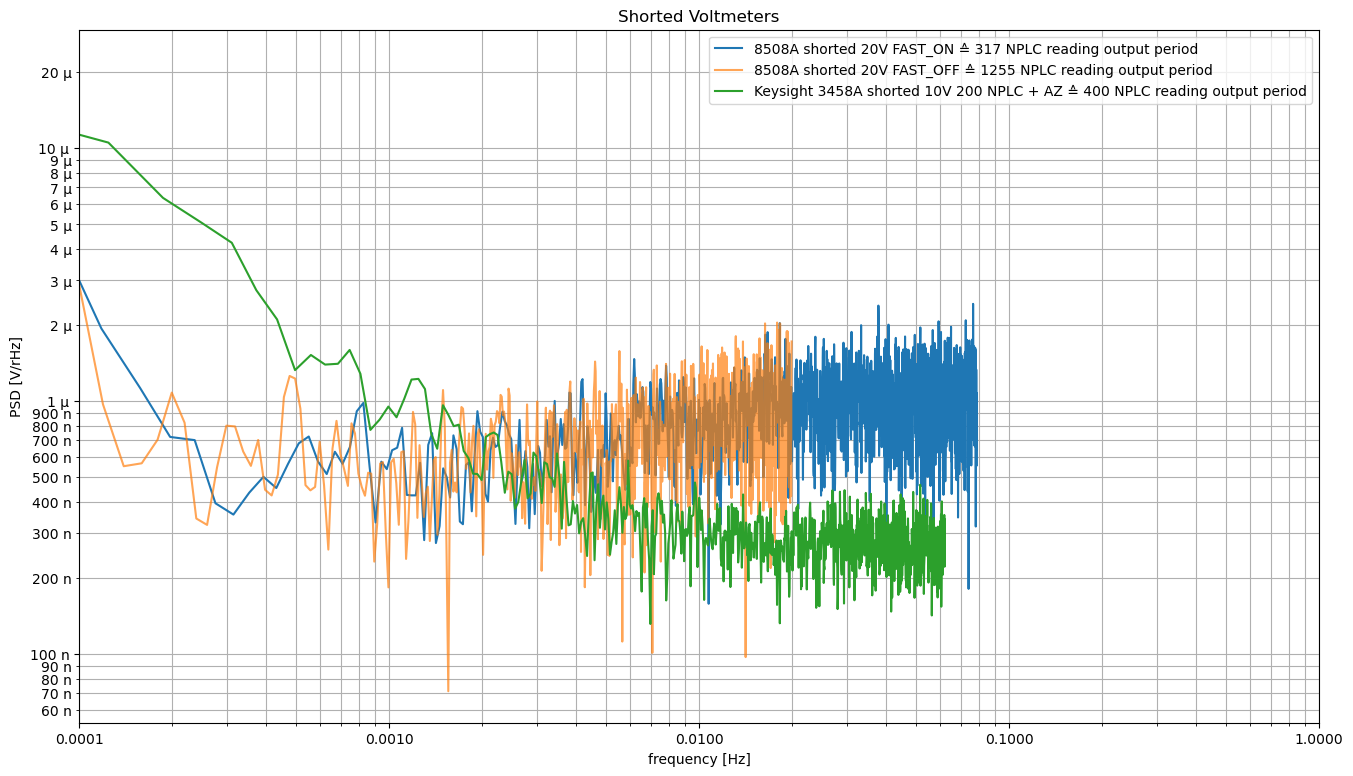

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import FormatStrFormatter

# Array from .csv
arr=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/fluke-8508A/main/csv/20240718-134109_F_8508A_short_10V_FAST_ON.csv',delimiter=',')
fs = 0.1574
f, S = scipy.signal.welch(arr[1:,1], fs, nperseg=4000)
f = f[1:-1]
S = np.sqrt(S[1:-1])

fig,ax = plt.subplots(figsize=(16,9))

#plt.figure(facecolor='white') # fix for exporting png file
plt.loglog()
plt.xlim([0.0001,1])
plt.xlabel('frequency [Hz]')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.yaxis.set_major_formatter(EngFormatter())
ax.yaxis.set_minor_formatter(EngFormatter())

#plt.yticks((1E-9, 3E-9, 1E-8, ))
plt.ylabel('PSD [V/rHz]')
plt.grid(True, which="both")
plt.title('Shorted Voltmeters')
plt.plot(f, S, label='8508A shorted 20V FAST_ON ≙ 317 NPLC reading output period')


# Array from .csv
arr=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/fluke-8508A/main/csv/20240719-174125_F_8508A_short_10V_FAST_OFF.csv',delimiter=',')
fs = 0.0398250
f, S = scipy.signal.welch(arr[1:,1], fs, nperseg=2000)
f = f[1:-1]
S = np.sqrt(S[1:-1])
plt.plot(f, S, label='8508A shorted 20V FAST_OFF ≙ 1255 NPLC reading output period', alpha=0.7)


# Array from .csv
arr=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/20240722-190810_3458B_10V_short_200NPLC_az.csv',delimiter=',',skip_header=1)
f, S = scipy.signal.welch(arr[:,1], 0.124389, nperseg=2000)
f = f[1:-1]
S = np.sqrt(S[1:-1])
plt.plot(f, S, label='Keysight 3458A shorted 10V 200 NPLC + AZ ≙ 400 NPLC reading output period')


plt.legend()